# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 8- Graphs and Breath First Search

From the point of view of _computer science_, a graph is similar to a tree (i.e. is a generalized linked list) with the difference that in a graph, a node can have multiple incoming links,or in other words, multiple parents.

From the point of view of _mathematics_, a graph is a tuple $$G=(V,E)$$ where the elements of $V$ are called the **nodes** or **vertices** of the graph and $E\subset V\times V$ contains tuples of the form $(u,v)$ where $u,v$ are nodes.
The elements of $E$ are called the **edges** or the **links** of the graph.

A graph encodes a system of elemements $V$ and their relations are encoded in $E$. 

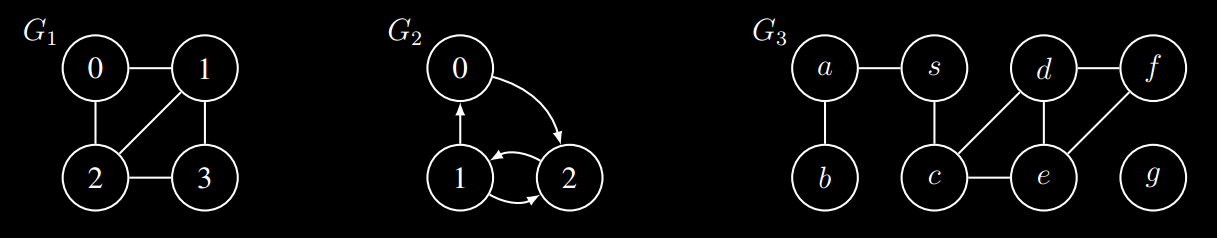

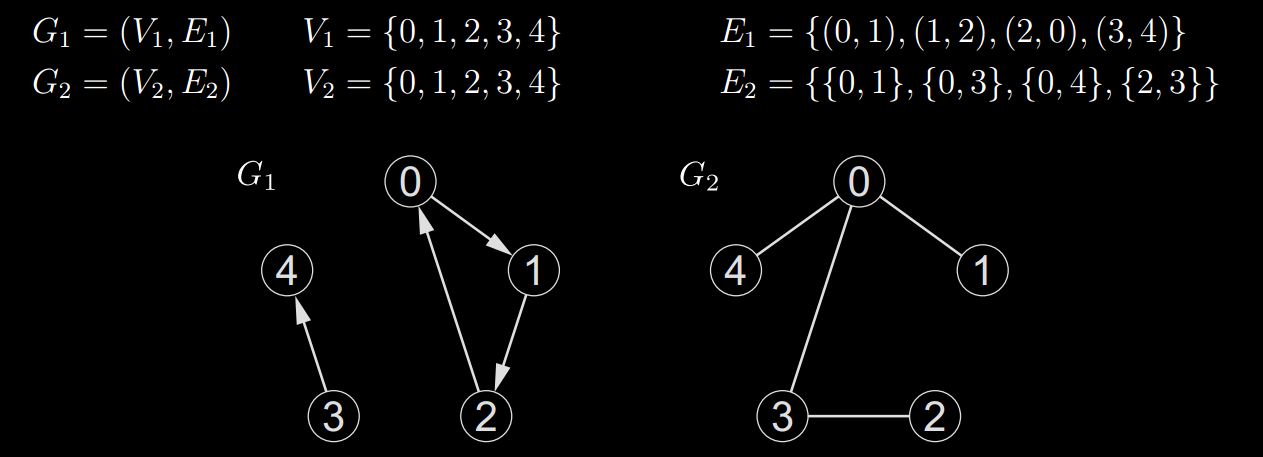

Note: a graph can be **directed** or **undirected**, depending on whether $E$ is symmetric or not. A rooted tree is always directed (from the parent to child).  

Note: we do not allow two edges between the same pair of nodes, or an edge from a node to itself. (**Simple graph**)
This implies that $|E|\leq \binom{|V|}{2}\in O(|V|^2)$ for undirected graphs.


A **path** from a node $u$ to a nde $v$ is a sequence $u_0, u_1, \ldots, u_k$ such that $u_0=u, u_k=v$ and $(u_i, u_{i+1})\in E$. The **length** of this path is $k$, i.e. the number of edges in the path.  

One thing that can exist in a graph but not in a tree is a **cycle**, i.e. a nontrivial path from a node to itself.  

A "large" and "sparse" graph is called a **network**. Neworks appear in many contexts such as:
- Transportation networks  
- Communication networks 
- Social networks (both online and offline)  
- Citation networks

Network theory is a science in itself and you can read about it [here](https://dreamintelligent.com/complex-network-analysis-course/). 

The **degree** of a node is the number of edges connected to it. In a directed graph we have **in-degree** and **out-degree**. 

There are various problems studied in graph and network theory such as:
- Connectedness
- Finding shortest paths and distances
- Node importance and centrality
- Community detection
- Graph representation 
- Graph generation


In this course we mostly focus on the first two problems. 



- The outgoing neighbor set of u ∈ V is $Adj^+(u) = \{v ∈ V | (u, v) ∈ E\}$
- The incoming neighbor set of u ∈ V is $Adj^-(u) = \{v ∈ V | (v, u) ∈ E\}$
- The out-degree of a vertex u ∈ V is $deg^+(u) = |Adj^+(u)|$
- The in-degree of a vertex u ∈ V is $deg^−(u) = |Adj^−(u)|$
- For undirected graphs, $Adj^−(u) = Adj^+(u)$ and $deg^−(u) = deg^+(u)$
- Dropping superscript defaults to outgoing, i.e., $Adj(u) = Adj^+(u)$ and $deg(u) = deg^+(u)$



If there is a path between two nodes $u,v$ in a graph, then we are interested in finding the **shortest path** between them. The problem of finding the shortest path is importamt in transportation, communication and social networks.
The **distance** between $u,v$ is the length of a shortest path between them. Note that the shortest path may not be unique!
If there is no path between two nodes at all, their distance is defined to be infinity. 

# Representing graphs in computers
To represent a graph in computer memory, for each node `u` we keep its immediate neighbors in a list `Adj(u)`. We then need a structure that maps `u` to `Adj(u)`. It can be either a direct  access array (when the nodes are represented by numbers) or a hash table.  

In the examples 1 and 2, below, assume vertices are labeled {0, 1, . . . , |V | − 1}, so can use a direct access 
array for Adj, and store Adj(u) in an array. Example 3 uses a hash table for Adj.
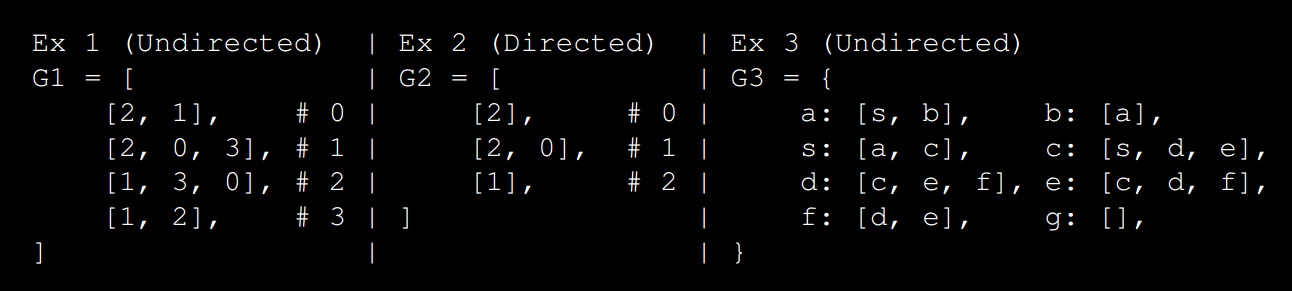


- To store a graph G = (V, E), we store the immediate neighbors Adj(u) for all u ∈ V
- First, need a Set data structure `Adj` to map `u` to `Adj(u)`: Common to use direct access array or hash table   
- Then for each `u`, need to store `Adj(u)`: Common to use array or linked list for each Adj(u) since usually only iteration is needed  


- For the common representations, `Adj` has size Θ(|V |), while each `Adj(u)` has size Θ(deg(u))   
- Since for each u∈V, $deg(u) ≤ 2|E|$, graph storable in Θ(|V | + |E|) space   
- Thus, for algorithms on graphs, linear time will mean Θ(|V | + |E|) (linear in size of graph in memory)    

# Adjacency matrix
After enumerating the vertices $$v_1, v_2, \ldots, v_n$$
$A_{i,j}=1 $ if and only if $(v_j, v_i)\in E$, and it's zero otherwise.

The adjacency matrix of an undirected graph is symmetric. 


We can encode the edge weights in the adjacency matrix of the graph. 

**Lemma:** $(A^m)_{i,j}$ equals the number of paths of length $m$ from $v_j$ to $v_i$.   
This lemma can be proved by induction.


**Consequence:** If $B=\sum_{m=0}^\infty A^m$ exists, then $B_{i,j}$ is the number of all the paths from $v_j$ to $v_i$ in the graph. 

The following result is similar to the sum of geometric series for a real number $a$.   
**Proposition:** if all the eigenvalues of $A$ are less than 1 and $I-A$ is invertible then $B=(I-A)^{-1}$. 

However the adjacency matrix can be quite large for a large graph and it is not efficient to work with. 



A **weighted graph** is one in which each edge has a weight which is a non-negative real number. The weight encodes the strength of the connection between the two nodes. For example in a transportation network the weight can represent the traffic in the route corresponding to an edge.



# Path-related problems in graphs
Let $s,t$ be two nodes in $G$. 

- `SINGLE_PAIR_REACHABILITY(G, s, t)`: is there a path from $s$ to $t$? 
-  `SINGLE_PAIR_SHORTEST_PATH(G, s, t)`: return distance δ(s,t), and a shortest path from $s$ to $t$. 
- `SINGLE_SOURCE_SHORTEST_PATHS(G, s)`: return δ(s, v) for all v ∈ V , and a shortest-path tree containing a shortest path from s to every v ∈ V.

Note that the third problem includes the second one, and the second problem includes the first problem. 


## Breath-first search (BFS)
BFS is a method of traversing a graph, starting from a source node $s$, which can be used for computing the distances from all the nodes to $s$. 

Starting from a node $s$ in the graph, we first find its immediate neighbors, whose distance from $s$ is 1, and we put them in a set $V$. We then find the immediate neighbors of those neighbor; let's call the set of them $U$. The distance of the elements of $U$ to $s$ is 2, unless they are already encountered in $V$. 
This way, the distance of a noded encountered in the $i$`th iteration of the algorithm is $i$, unless it has already been assigned a distance in the earlier iterations. 


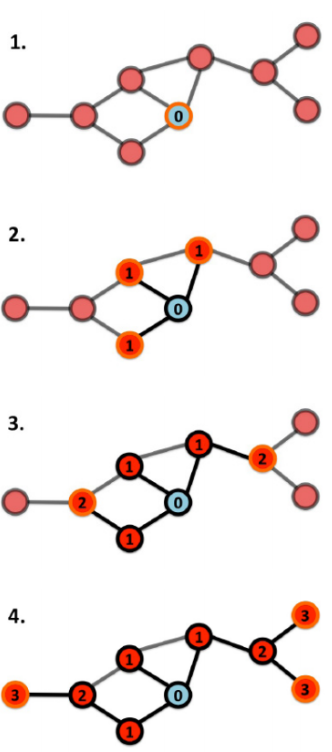

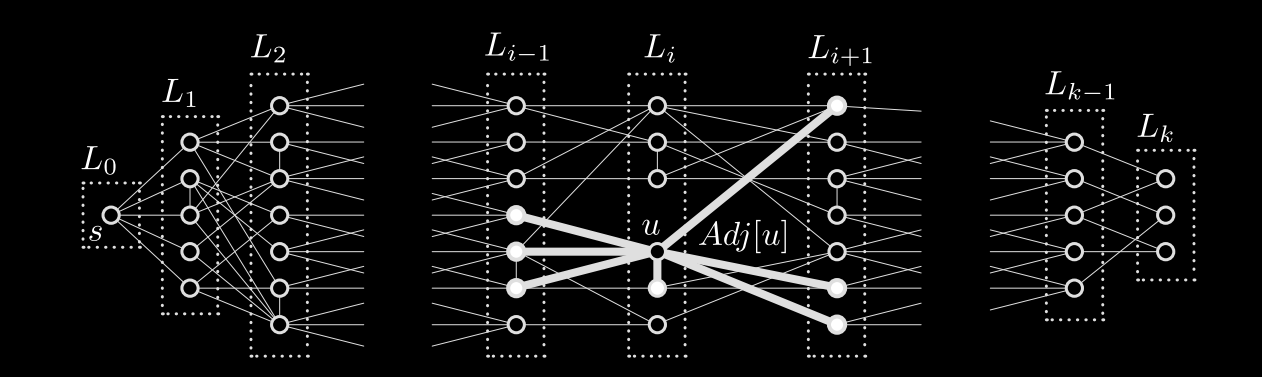

**Exercise:** write the Python code or pseudocode for this algorithm.

In [ ]:
def BFS(Adj, s):
    dist=[-1]*len(Adj)
    buffer=[s]
    dist[s]=0
    i=1
    while(buffer!=[]):
        newbuff=[]
        for x in buffer:
            for y in Adj[x]:
                if dist[y]==-1:
                    dist[y]=i
                    newbuff.append(y)
        buffer=newbuff 
        i+=1       
    return dist


G=[ [2,1], [2,0,3], [1,3,0], [1,2] ]

BFS(G, 0)


[0, 1, 1, 2]

Not only we want the distances from the nodes to $s$, we want the shortest path too. 

How to return a shortest path from source vertex s for every vertex in graph?  
Many paths could have length Ω(|V|), so returning every path could require $Ω(|V |^2)$ time.   
Instead, for all v ∈ V , store its _parent_ P(v): second to last vertex on a shortest path from s.

In the following code:  
- `level[i]` will contain the elements of distance i from $s$. At each iteration, `level[-1]` contains the "boundary" (or active) nodes.
- `parent[x]` will contain the parent of `x` i.e. the second-to-last node on the shortest path from $s$ to $i$. 

In [ ]:
# Assuming that vertices are labeled by integers
def bfs(Adj, s):                            # Adj: adjacency list, s: starting vertex
    parent = [None for v in Adj]            # O(|V|) Contains the parent of each node(use hash if unlabeled)
    parent[s] = s                            # O(1) root
    level = [[s]]  #level[0]=[s]             # O(1) initialize levels
    while 0 < len(level[-1]):                 # O(?) While the last level is not empty
        # The new level
        level.append([])   #level[-1]           # O(1) amortized, make new level
        # level[-2] is now the level[-1] above
        # Setting the neighbors of the elements of this layer, which have not been encountered before
        for u in level[-2]:                  # O(?) loop over last full level
            for v in Adj[u]:                 # O(Adj[u]) loop over neighbors
                if parent[v] is None:        # O(1) If parent not yet assigned, i.e. if the node was not encountered before
                    parent[v] = u             # O(1) assign the parent from level[-2]
                    level[-1].append(v)       # O(1) amortized, add v to the last level
    return parent

bfs(G, 0)

[0, 0, 0, 2]

**Exercise:** run the above code by hand for the adjacebcy lists G1, G2, G3 above. 


**Computational complexity:** The loop in line 8 cycles through all 
deg(v) outgoing edges from vertex v. The inner loop is repeated at most $O( \sum_v deg(v)) = O(|E|)$ times. Because the v∈V
parent array returned has length |V |, breadth-first search runs in O(|V | + |E|) time. 

## Constructiong shortest paths from the parents list

One can easily prove that if $v_0, v_1, v_2,\ldots, v_k$ is a shortest path between $v_0,v_k$ then it is a for any $0\leq i<j\leq k$, $v_i, v_{i+1}, \ldots, v_j$ is a shortest path between $v_i, v_j$ too.  

In [ ]:
def unweighted_shortest_path(Adj, s, t):
    parent = bfs(Adj, s)        # O(V + E) BFS tree from s
    if parent[t] is None:       # O(1) t reachable from s?
        return None             # O(1) no path
    i = t                       # O(1) label of current vertex; we cnstruct the path backwards
    path = [t]                  # O(1) initialize path
    while i != s:               # O(V) walk back to s
        i = parent[i]           # O(1) move to parent
        path.append(i)          # O(1) amortized add to path
    
    return path[::-1]           # O(V) return reversed path
